<a href="https://colab.research.google.com/github/maxtuno/Hyperconvergent-Prompt-Engineering/blob/main/SumSubsetProblem_vs_DeepLearning/SumSubsetProblem_vs_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
MIT License

Copyright (c) 2023 Oscar Riveros

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

'\nMIT License\n\nCopyright (c) 2023 Oscar Riveros\n\nPermission is hereby granted, free of charge, to any person obtaining a copy\nof this software and associated documentation files (the "Software"), to deal\nin the Software without restriction, including without limitation the rights\nto use, copy, modify, merge, publish, distribute, sublicense, and/or sell\ncopies of the Software, and to permit persons to whom the Software is\nfurnished to do so, subject to the following conditions:\n\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\n\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\nFITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\nAUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\nLIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FRO

### Note: There is an experimental Deep Learning Model for the Sum Subset Problem, is very limited, and only an experimental try.

In [2]:
# get SATX library (The TOP 1 in the World! :)
!pip install satx
# get SLIME SAT Solver (The TOP 1 in the World! :D
!git clone https://github.com/maxtuno/SLIME
!cmake -DCMAKE_BUILD_TYPE=Release SLIME
!make
!mv ./SLIME/bin/slime ./slime

  Preparing metadata (setup.py) ... done
  Created wheel for satx: filename=SATX-0.3.8-py3-none-any.whl size=19743 sha256=b8f27de9c00d2984677ff8688761aea283002dc31e58368e3096350836a10964
  Stored in directory: /root/.cache/pip/wheels/6b/c8/9d/ee69811c08ba210630764133757e459a2d8dcf7729e9ab04c9
Successfully built satx
Cloning into 'SLIME'...
remote: Enumerating objects: 1552, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 1552 (delta 54), reused 19 (delta 10), pack-reused 1451
Receiving objects: 100% (1552/1552), 12.10 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (827/827), done.
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import satx

In [4]:
def gen_data(bits, size, context_size, number_of_samples, verbose=False):
    input_data = []
    output_data = []
    if context_size < bits:
        print('Invalid parameters...')
        return [], []
    while len(input_data) < number_of_samples:
        inputs = []
        outputs = []
        universe =[random.randint(1, 2 ** bits) for _ in range(size)]
        t = sum(random.sample(universe, k=size // 2))
        if context_size > t.bit_length():
            satx.engine(t.bit_length(), cnf_path='tmp.cnf')
            x = satx.tensor(dimensions=(len(universe)))
            assert sum(x[[i]](0, universe[i]) for i in range(len(universe))) == t
            if satx.satisfy(solver='./slime'):
                sub = [universe[i] for i in range(len(universe)) if x.binary[i]]
                if verbose:
                    print(universe)
                    print(t, sum(sub), sub)
            else:
                if verbose:
                    raise Exception('Infeasible ...')
                continue
            for number in universe + [t]:
                i = list(map(int, bin(number)[2:]))
                i = [0] * (context_size - len(i)) + i
                inputs.append(i)
            o = list(map(int, bin(x.value)[2:]))
            o = [0] * (context_size - len(o)) + o
            outputs += o
        else:
            continue
        input_data.append(inputs)
        output_data.append(outputs)
    if number_of_samples == 1:
        return np.asarray(input_data), np.asarray(output_data), t, universe, list(map(int, x.binary))
    return np.asarray(input_data), np.asarray(output_data)

In [5]:
size = 10
bits = 8
context_size = 12
number_of_samples = 1

# (t, universe, subset_solution) only if number_of_samples == 1
input_data, output_data, t, universe, subset_solution = gen_data(bits, size, context_size, number_of_samples, verbose=True)

print(input_data)
print(output_data)

[145, 172, 107, 127, 213, 48, 12, 1, 205, 94]
373 373 [172, 107, 94]
[[[0 0 0 0 1 0 0 1 0 0 0 1]
  [0 0 0 0 1 0 1 0 1 1 0 0]
  [0 0 0 0 0 1 1 0 1 0 1 1]
  [0 0 0 0 0 1 1 1 1 1 1 1]
  [0 0 0 0 1 1 0 1 0 1 0 1]
  [0 0 0 0 0 0 1 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 1 1 0 0 1 1 0 1]
  [0 0 0 0 0 1 0 1 1 1 1 0]
  [0 0 0 1 0 1 1 1 0 1 0 1]]]
[[0 0 1 0 0 0 0 0 0 1 1 0]]


In [6]:
def algorithm_learning(n, m, input_data, output_data, test_input_data, test_output_data):
    # TODO: Put a decent model here...
    preprocessing_layers = [
        tf.keras.layers.InputLayer(input_shape=(m, n, 1)),
    ]

    def conv_2d_pooling_layers(filters, number_colour_layers):
        return [
            tf.keras.layers.Conv2D(
                filters,
                number_colour_layers,
                padding='same',
                activation='relu'
            ),
        ]

    core_layers = \
        conv_2d_pooling_layers(8, 1) + \
        conv_2d_pooling_layers(16, 1) + \
        conv_2d_pooling_layers(32, 1) + \
        conv_2d_pooling_layers(64, 1) + \
        conv_2d_pooling_layers(128, 1)

    dense_layers = [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(n, activation='sigmoid')
    ]

    # Build the CNN model
    model = tf.keras.Sequential(
        preprocessing_layers +
        core_layers +
        dense_layers
    )

    checkpoint = tf.keras.callbacks.ModelCheckpoint('./checkpoints/hess_model_{}_{}'.format(n, m),
                                                    monitor="val_binary_accuracy",
                                                    mode="max",
                                                    save_weights_only=False,
                                                    save_best_only=True,
                                                    verbose=1)
    callbacks = [checkpoint]

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['binary_accuracy'])

    # Train the model
    epochs = 20

    history = model.fit(input_data,
                        output_data,
                        validation_data=(test_input_data, test_output_data),
                        epochs=epochs,
                        batch_size=128,
                        callbacks=callbacks)

    # Restore the best model
    model = tf.keras.models.load_model(
        './checkpoints/hess_model_{}_{}'.format(n, m))

    print("Evaluate on test data")
    results = model.evaluate(test_input_data, test_output_data)
    print("test loss, test acc:", results)

    plt.clf()
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show() # plt.savefig('acc_history.png')

    plt.clf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show() # savefig('loss_hystory.png')


In [7]:
size = 30
bits = 8
context_size = 100 # need a "big" context_size to get good results?, but... mmm...
number_of_samples = 50

print('gen data')
input_data, output_data = gen_data(bits, size, context_size, number_of_samples)

print('gen test data')
test_input_data, test_output_data = gen_data(bits, size, context_size, number_of_samples)

gen data
gen test data


Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.6931 - binary_accuracy: 0.5016
Epoch 1: val_binary_accuracy improved from -inf to 0.78860, saving model to ./checkpoints/hess_model_100_31
1/1 [==============================] - 23s 23s/step - loss: 0.6931 - binary_accuracy: 0.5016 - val_loss: 0.6122 - val_binary_accuracy: 0.7886
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 0.6078 - binary_accuracy: 0.7926
Epoch 2: val_binary_accuracy improved from 0.78860 to 0.83420, saving model to ./checkpoints/hess_model_100_31
1/1 [==============================] - 7s 7s/step - loss: 0.6078 - binary_accuracy: 0.7926 - val_loss: 0.4915 - val_binary_accuracy: 0.8342
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 0.4810 - binary_accuracy: 0.8432
Epoch 3: val_binary_accuracy improved from 0.83420 to 0.84380, saving model to ./checkpoints/hess_model_100_31
1/1 [==============================] - 7s 7s/step - loss: 0.4810 - binary_accuracy: 0.8432 

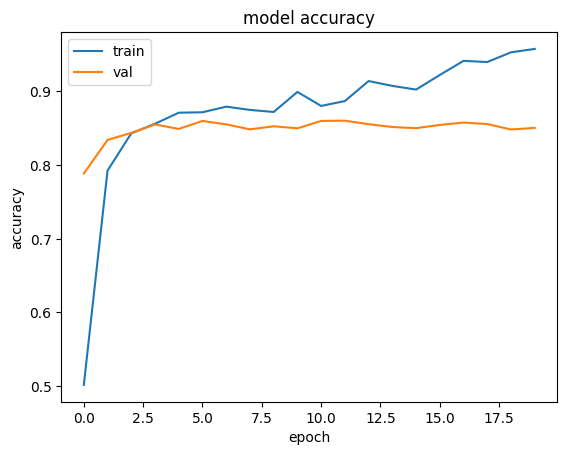

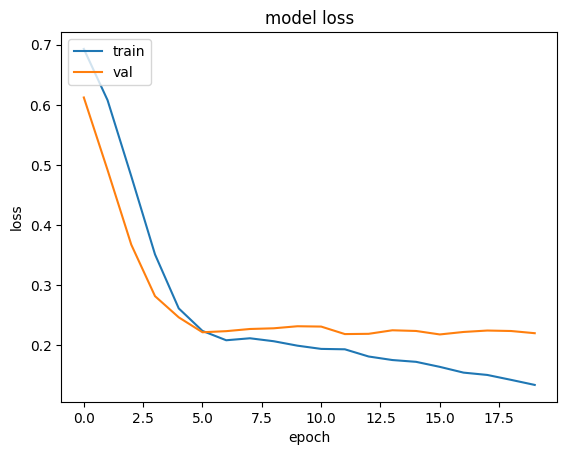

In [8]:
algorithm_learning(context_size, size + 1, input_data, output_data, test_input_data, test_output_data)

In [9]:
# Restore the model
model = tf.keras.models.load_model('./checkpoints/hess_model_{}_{}'.format(context_size, size + 1))

In [28]:
number_of_samples = 1

input_data, output_data, t, universe, subset_solution = gen_data(bits, size, context_size, 1, verbose=True)

print(input_data)
print(output_data)

[141, 151, 239, 136, 67, 32, 97, 167, 184, 190, 16, 110, 9, 60, 223, 27, 204, 76, 94, 117, 181, 206, 221, 100, 222, 50, 206, 3, 61, 182]
1867 1867 [141, 151, 67, 32, 97, 184, 190, 110, 60, 27, 204, 76, 94, 117, 206, 50, 61]
[[[0 0 0 ... 1 0 1]
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 1 0]
  [0 0 0 ... 0 1 1]]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1]]


In [29]:
prediction = model.predict(input_data)[0]
subset_prediction = prediction > 0.5
subset_prediction = list(map(int, subset_prediction))
print(subset_prediction)

1/1 [==============================] - 0s 20ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]


In [30]:
print(universe)
print(t)
print(subset_solution)

subset = subset_prediction[-len(universe):]

print(subset)

subset_model = [universe[i] for i in range(len(universe)) if subset[i]]
subset_real = [universe[i] for i in range(len(universe)) if subset_solution[i]]

print(sum(subset_model), sum(subset_real))
print('gap : {}'.format(abs(sum(subset_model) - sum(subset_real))))

[141, 151, 239, 136, 67, 32, 97, 167, 184, 190, 16, 110, 9, 60, 223, 27, 204, 76, 94, 117, 181, 206, 221, 100, 222, 50, 206, 3, 61, 182]
1867
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
1780 1867
gap : 87
